In [18]:
JAVA_KEYWORDS = ["abstract", "assert", "boolean",
                "break", "byte", "case", "catch", "char", "class", "const",
                "continue", "default", "do", "double", "else", "extends", "false",
                "final", "finally", "float", "for", "goto", "if", "implements",
                "import", "instanceof", "int", "interface", "long", "native",
                "new", "null", "package", "private", "protected", "public",
                "return", "short", "static", "strictfp", "super", "switch",
                "synchronized", "this", "throw", "throws", "transient", "true",
                "try", "void", "volatile", "while"]

In [19]:
from os import listdir
from os.path import abspath, isfile, join
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_bar, aes, scale_x_discrete, theme, element_text, scale_y_discrete, \
	scale_x_continuous, labs, scale_y_continuous, geom_line


path = "C:/Nitsan/third/JavaAnalyzer"
files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".csv")]
word_analysis_files = [f for f in files if f.startswith("analyzerResults_frequency_")]
word_lengths_analysis_files = [f for f in files if f.startswith("analyzerResults_lengths_")]

In [20]:
def filter_words(words_df):
	return words_df[words_df['word'].isin(JAVA_KEYWORDS)]


In [21]:
all_frequencies = pd.read_csv(abspath(join(path, 'analyzerResults_frequency_ALL.csv')))
filtered_out_words = all_frequencies[np.where(all_frequencies['external'] == 1, True, False)]['word']
print("Filtered out words:")
print("\n".join(filtered_out_words.values.tolist()))

Filtered out words:
T
String
R
Object
Throwable
requireNonNull
IOException
Integer
Class
List
com
java
K
serialVersionUID
V
AtomicReference
Long
toString
Map
Type
InterruptedException
Collection
Iterable
InputStream
ArrayList
Math
Set
Arrays
OutputStream
Boolean
AtomicLong
Collections
NullPointerException
AtomicInteger
RuntimeException
HashMap
AtomicThrowable
AtomicBoolean
Double
trim
Float
main


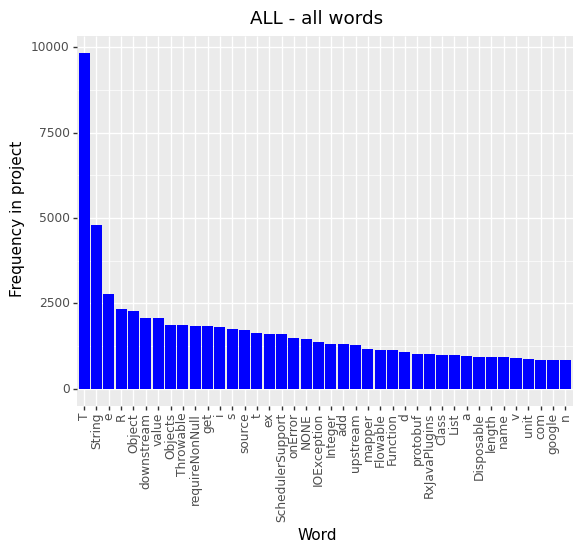

<ggplot: (121945404639)>
/n
<ggplot: (121945660564)>
/n
<ggplot: (121945769331)>
/n
<ggplot: (121946011242)>
/n
<ggplot: (121946156511)>
/n
<ggplot: (121946010347)>
/n
<ggplot: (121945233975)>
/n
<ggplot: (121946613291)>
/n
<ggplot: (121946590507)>
/n
<ggplot: (121946815326)>
/n
<ggplot: (121946338645)>
/n
<ggplot: (121947076666)>
/n
<ggplot: (121947316860)>
/n
<ggplot: (121947617305)>
/n


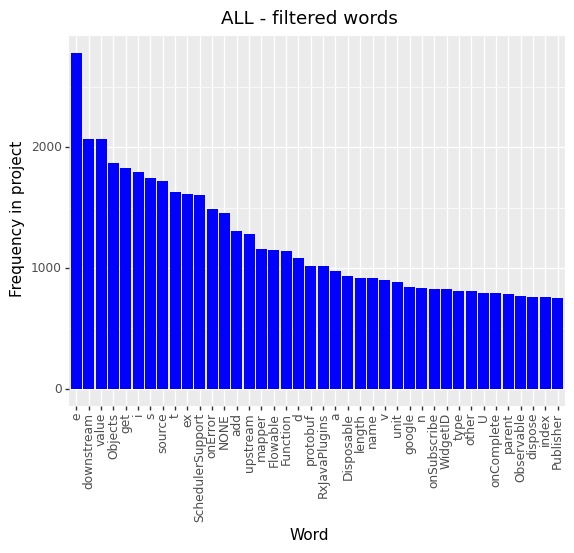

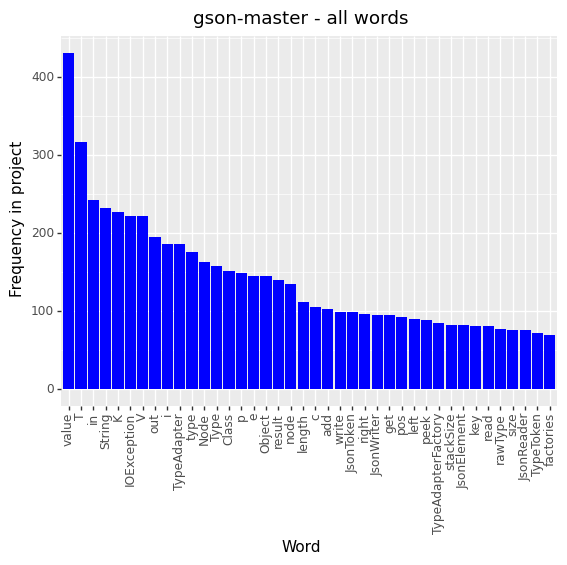

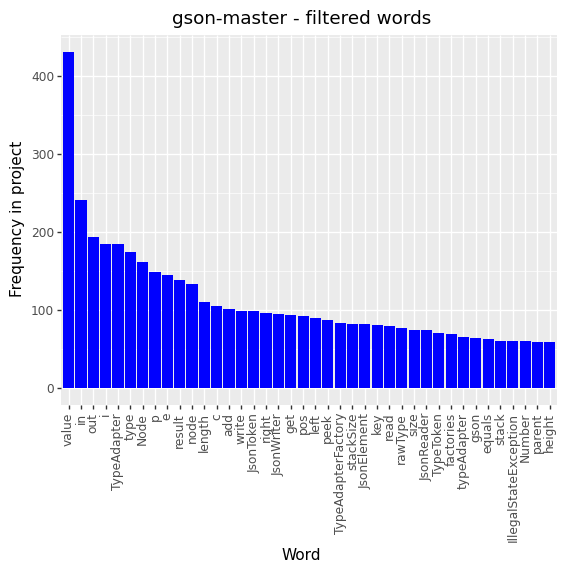

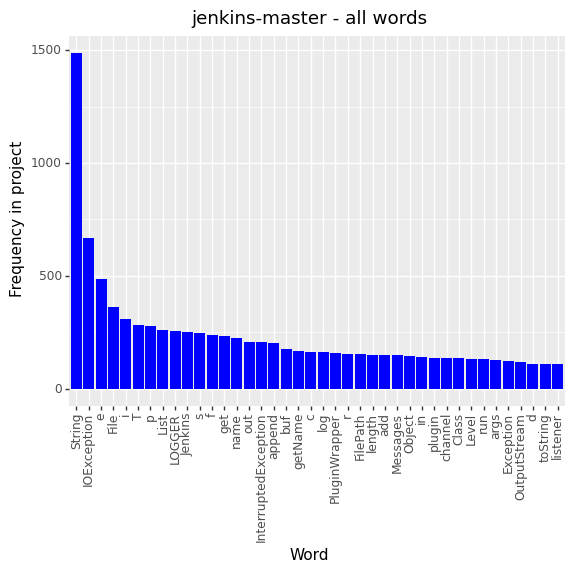

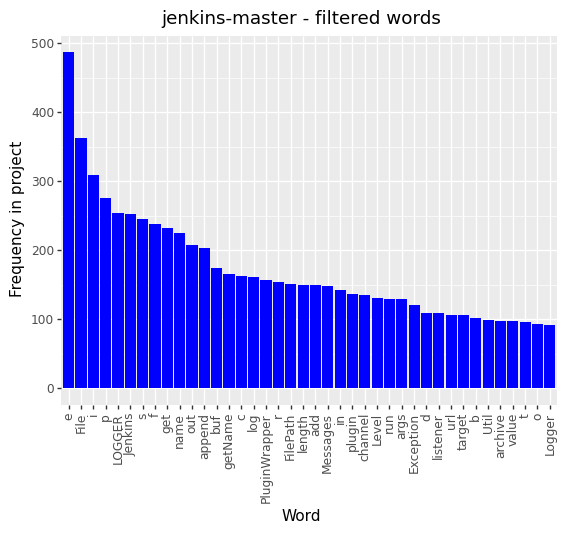

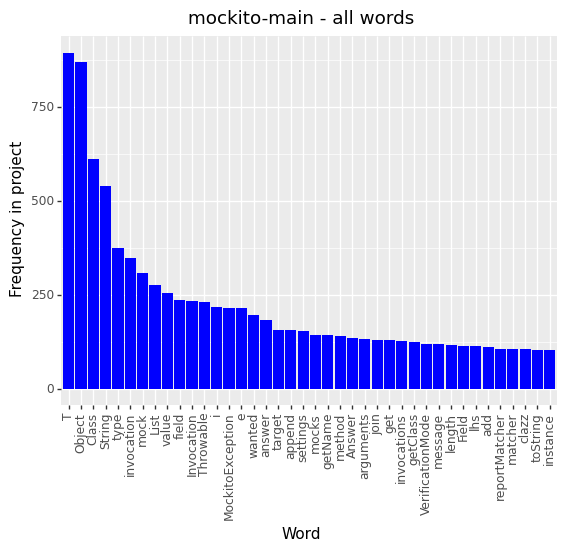

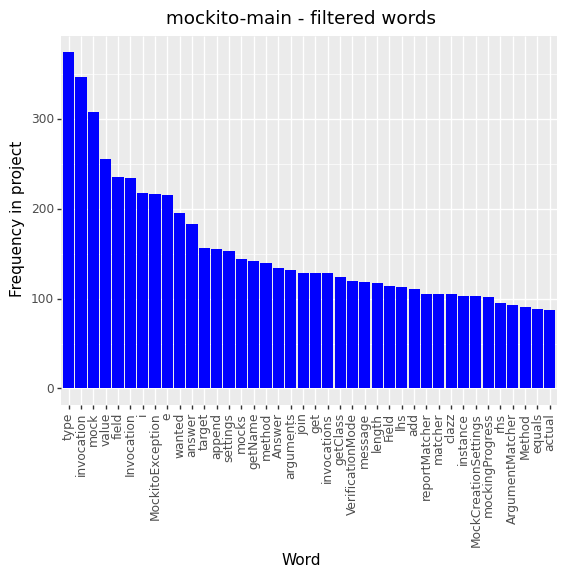

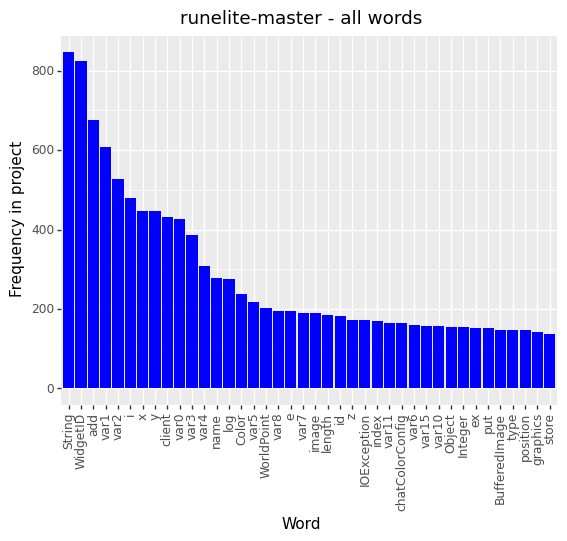

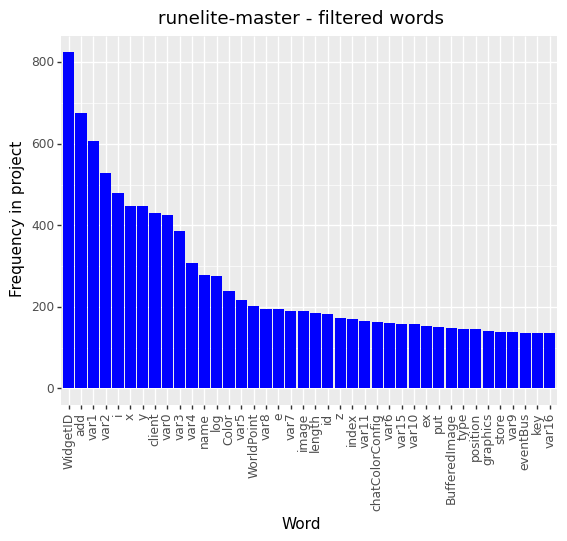

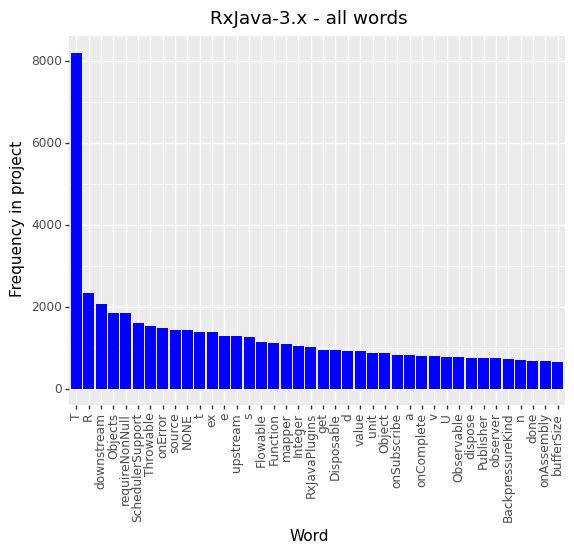

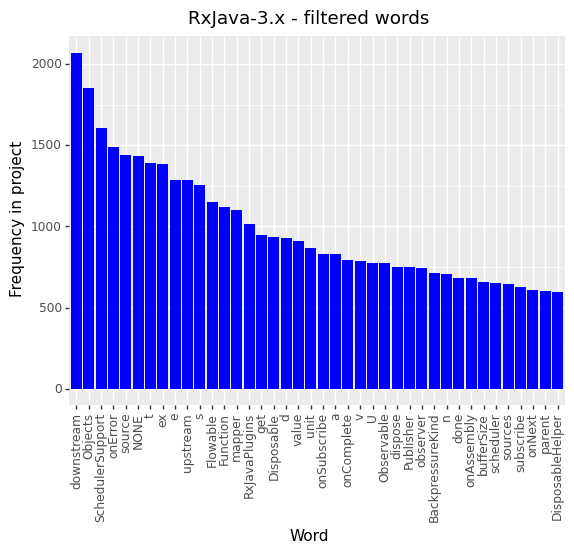

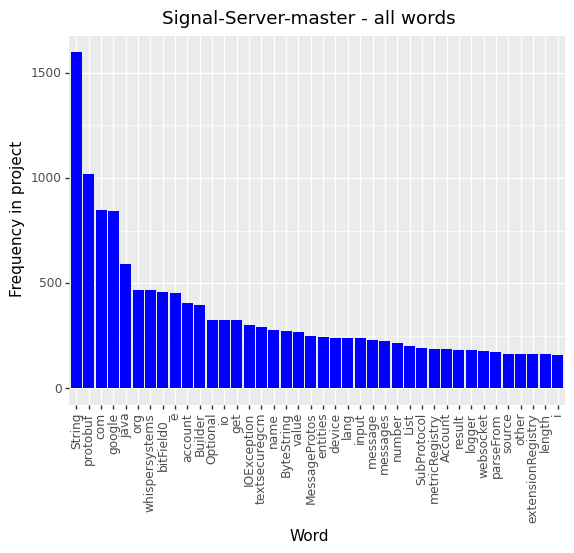

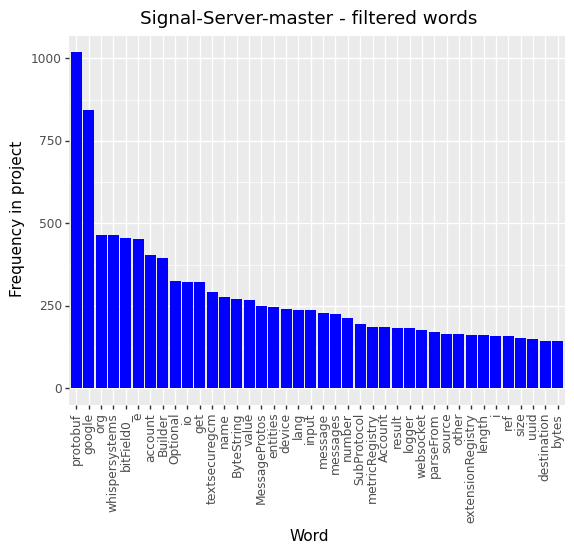

In [22]:
for file in word_analysis_files:
	csv = pd.read_csv(abspath(join(path, file)))
	filtered_words = csv[~csv['word'].isin(filtered_out_words)]
	filtered_words = filtered_words.nlargest(40, 'frequency')
	csv = csv.nlargest(40, 'frequency')

	print(
		ggplot(csv)
		+ labs(x="Word", y="Frequency in project", title=file[26:-4] + " - all words")
		+ scale_x_discrete(limits=csv['word'].tolist())
		+ geom_bar(aes(x='word', y='frequency'), stat='identity', fill='blue')
		+ theme(axis_text_x=element_text(rotation=90))
	)
	print("/n")

	print(
		ggplot(filtered_words)
		+ labs(x="Word", y="Frequency in project", title=file[26:-4]+" - filtered words")
		+ scale_x_discrete(limits=filtered_words['word'].tolist())
		+ geom_bar(aes(x='word', y='frequency'), stat='identity', fill='blue')
		+ theme(axis_text_x=element_text(rotation=90))
	)
	print("/n")



c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing val

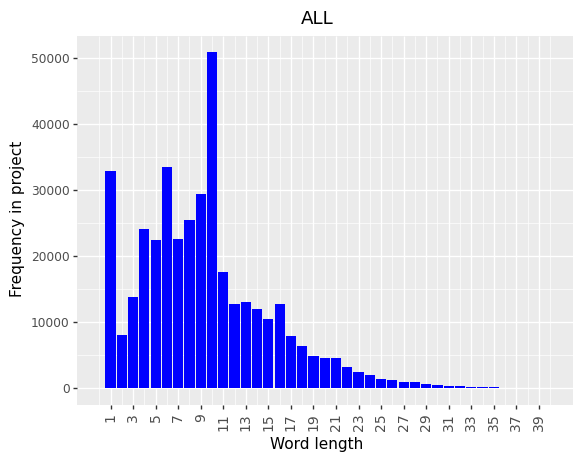

<ggplot: (121946339359)>
/n
<ggplot: (121946590477)>
/n
<ggplot: (121945757383)>
/n
<ggplot: (121946189909)>
/n
<ggplot: (121946051069)>
/n
<ggplot: (121946081314)>
/n
<ggplot: (121946189903)>
/n


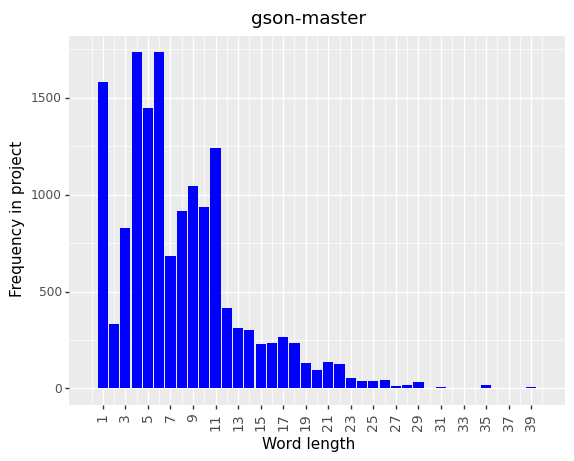

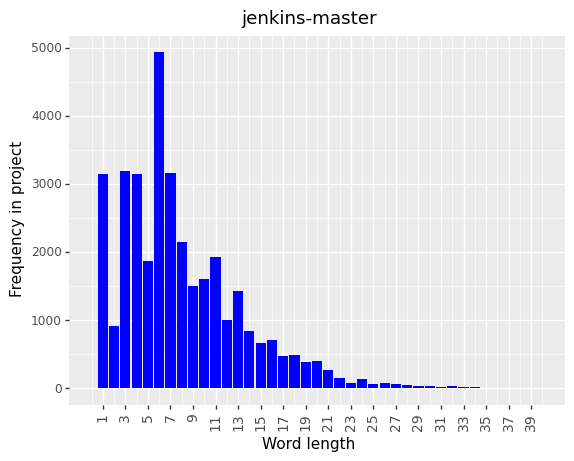

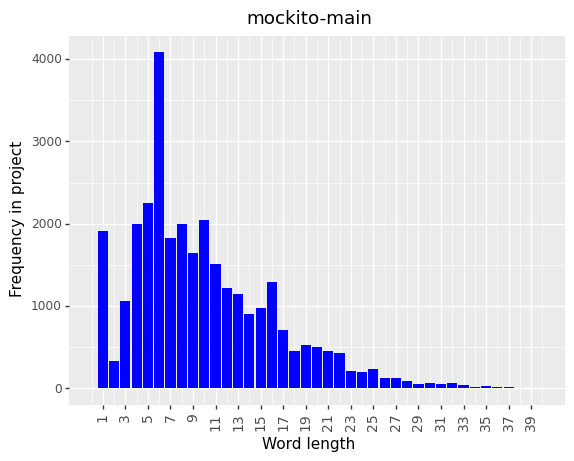

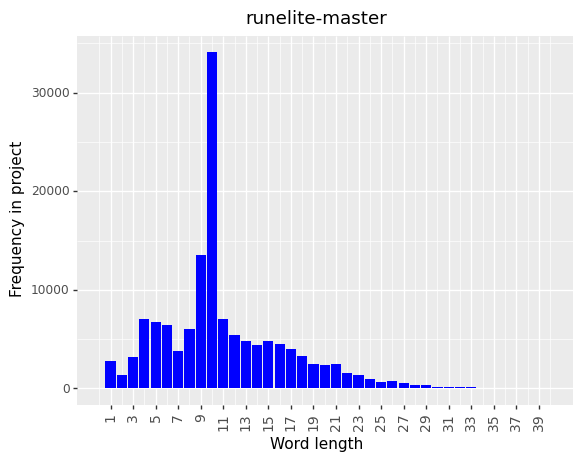

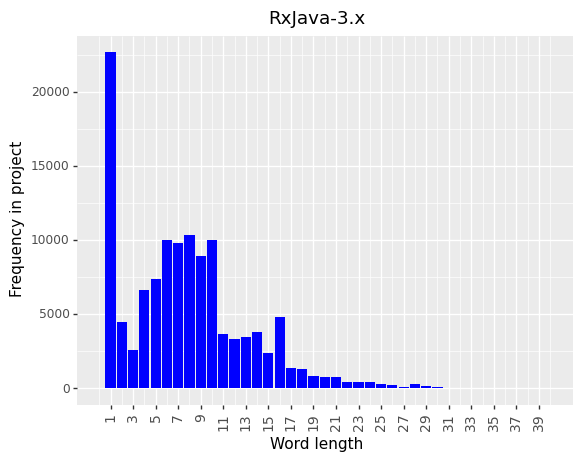

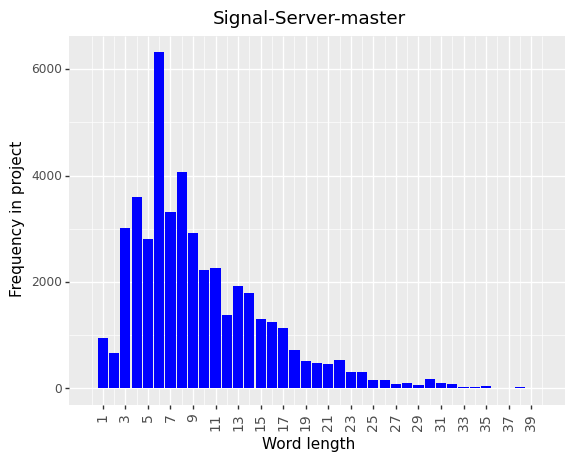

In [23]:
for file in word_lengths_analysis_files:
	csv = pd.read_csv(abspath(join(path, file)))
	csv = csv.nsmallest(40, 'word_length')

	print(
		ggplot(csv)
		+ labs(x="Word length", y="Frequency in project", title=file[24:-4])
		+ scale_x_continuous(limits=(0, 40), breaks=range(1, 41, 2))
		+ geom_bar(aes(x='word_length', y='frequency'), stat='identity', fill='blue')
		+ theme(axis_text_x=element_text(rotation=90, size='10'))
	)
	print("/n")




c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\alich\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inp

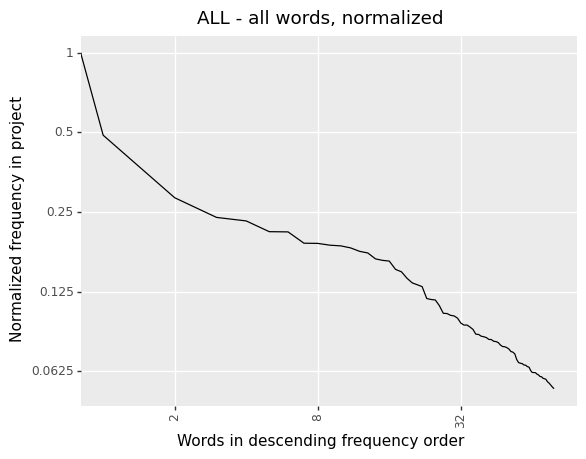

<ggplot: (121946189939)>
/n
<ggplot: (121947806383)>
/n
<ggplot: (121951023981)>
/n
<ggplot: (121951032016)>
/n
<ggplot: (121947785138)>
/n
<ggplot: (121947484043)>
/n
<ggplot: (121946123617)>
/n
<ggplot: (121951033838)>
/n
<ggplot: (121946189972)>
/n
<ggplot: (121947347782)>
/n
<ggplot: (121945764810)>
/n
<ggplot: (121947076774)>
/n
<ggplot: (121947460377)>
/n
<ggplot: (121947075232)>
/n


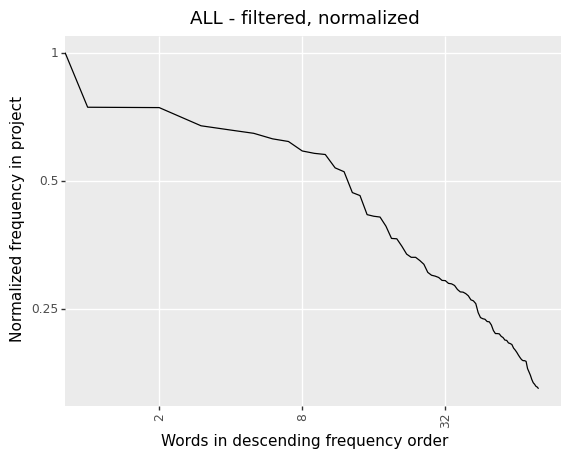

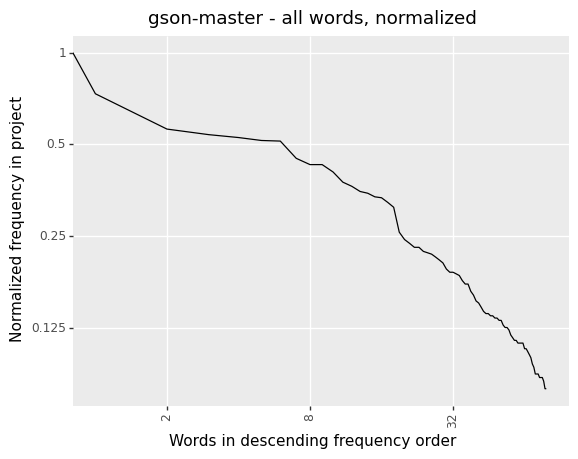

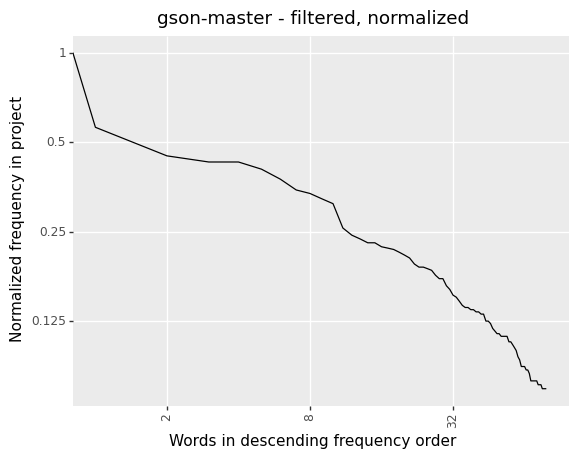

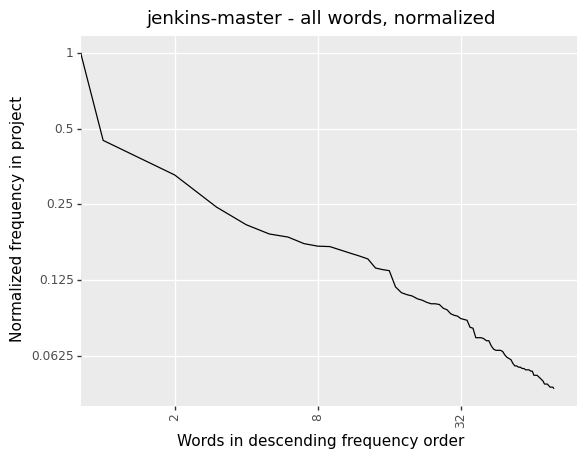

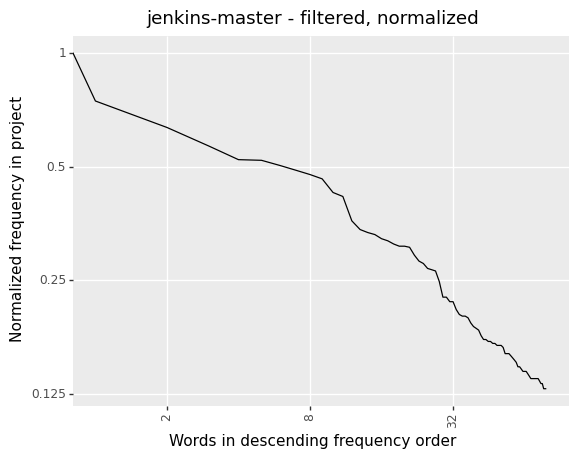

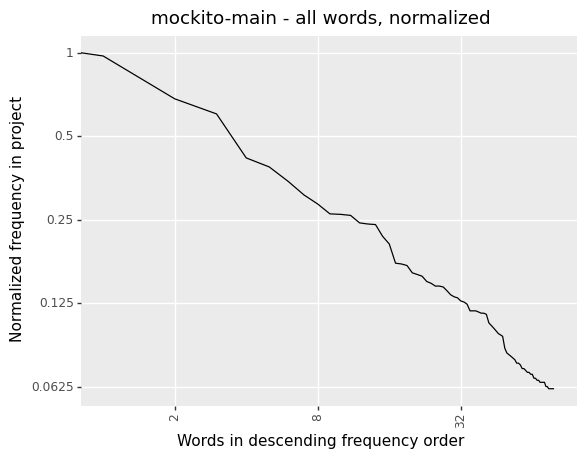

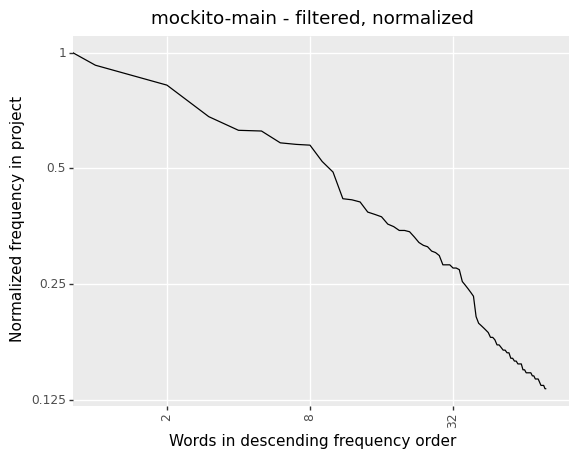

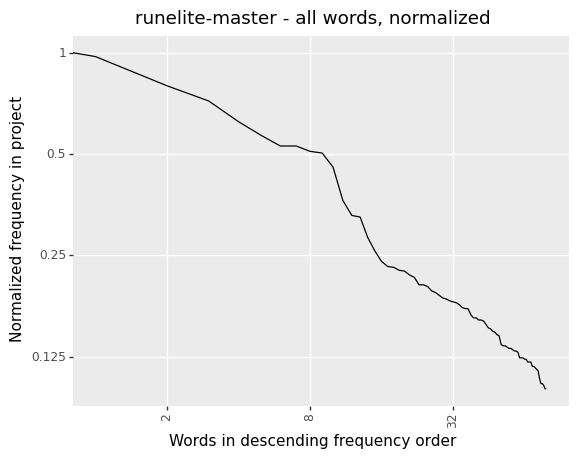

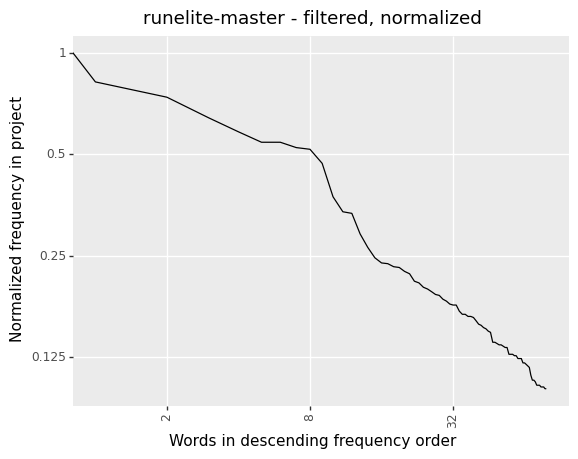

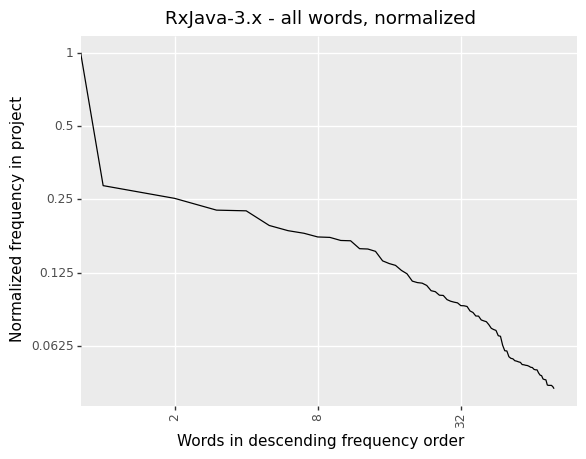

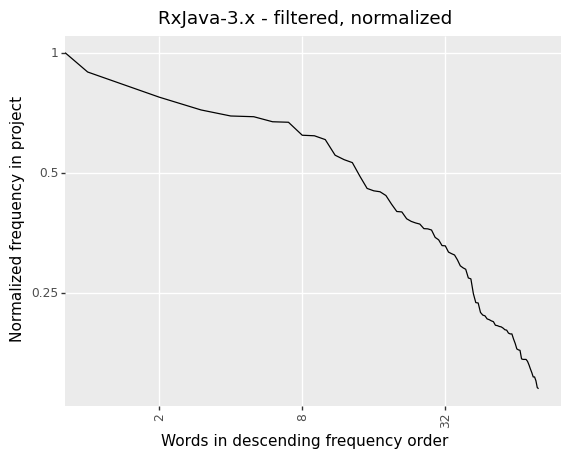

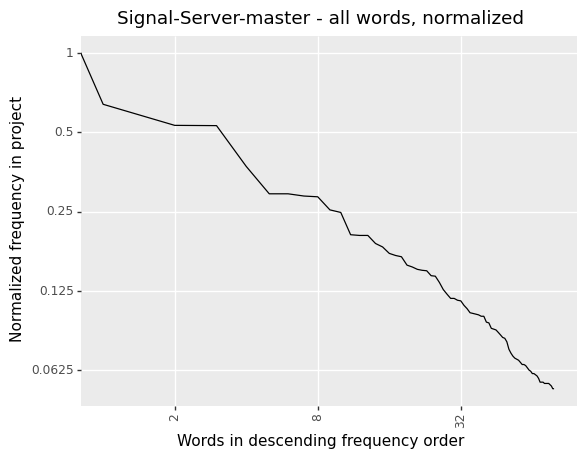

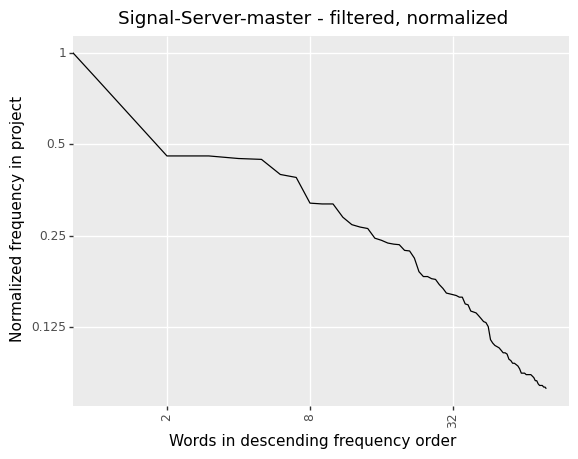

In [24]:
for file in word_analysis_files:
	csv = pd.read_csv(abspath(join(path, file)))
	filtered_words = csv[~csv['word'].isin(filtered_out_words)]
	filtered_words = filtered_words.nlargest(80, 'frequency')
	csv = csv.nlargest(80, 'frequency')
	frequency_of_rank_1_all = int(csv[:1]['frequency'])
	frequency_of_rank_1_filtered = int(filtered_words[:1]['frequency'])

	csv['frequency_by_rank'] = csv['frequency'] / frequency_of_rank_1_all
	csv['x'] = np.linspace(0, 79, 80)
	filtered_words['frequency_by_rank'] = filtered_words['frequency'] / frequency_of_rank_1_filtered
	filtered_words['x'] = np.linspace(0, 79, 80)


	print(
		ggplot(csv)
		+ labs(x="Words in descending frequency order",
			   y="Normalized frequency in project",
			   title=file[26:-4] + " - all words, normalized")
		+ scale_x_continuous(trans = 'log2') + scale_y_continuous(trans = 'log2')
		+ geom_line(aes(x='x', y='frequency_by_rank'), stat='identity')
		+ theme(axis_text_x=element_text(rotation=90))
	)
	print("/n")

	print(
		ggplot(filtered_words)
		+ labs(x="Words in descending frequency order",
			   y="Normalized frequency in project",
			   title=file[26:-4] + " - filtered, normalized")
		+ scale_x_continuous(trans = 'log2')
		+ scale_y_continuous(trans = 'log2')
		+ geom_line(aes(x='x', y='frequency_by_rank'), stat='identity')
		+ theme(axis_text_x=element_text(rotation=90))
	)
	print("/n")


